# Nesse projeto irei extrair dados de ações das principais vacinas da COVID 19 no site https://stooq.com/ e transformar em Dashbord interativo

# Importando Biblioteca utilizadas no projeto

In [7]:
import pandas as pd
import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas_datareader.data as web
import datetime
from IPython.display import Image

# Extraindo dados da API da STOOQ e transformandoem um DATAFRAME

In [2]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2022,5,1)

df = web.DataReader(['SVAC','JNJ','PFE','MRNA','BNTX'],
                    'stooq', start=start, end=end)

df = df.stack().reset_index()
df = df.rename(columns={'level_0': 'Date'})
df.head()





Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2019-01-02,JNJ,117.230,117.810,115.890,117.590,8316297.0
1,2019-01-02,PFE,38.266,38.487,37.721,38.151,28342674.0
2,2019-01-02,MRNA,15.330,15.450,14.510,14.930,2318094.0
3,2019-01-03,JNJ,115.370,117.710,115.040,117.590,9431083.0
4,2019-01-03,PFE,37.194,38.344,37.115,38.256,30565892.0


In [3]:
cores = ["black", "red", "blue", "orange"]

# Criando um Callback com os dados extraidos e gerando um Dashboard direto no servidor

In [4]:
app2 = dash.Dash(__name__)

app2.layout = html.Div(

    children = [

        # html.H1(id = 'output-titulo', children='Valor de Ação - Covid-19',  style={} ),
        html.H1( children='Valor de Ação - Vacina',  style={'text-align': 'center'}),

        # dash component 
        dcc.Dropdown( id = 'meu-dropdown', multi = True,
                    options = [{ 'label': x , 'value': x   } for x in sorted(df.Symbols.unique())  ],
                    value = [  'AMZN','GOOGL','FB','PFE','MRNA','BNTX']
                    ,style={'text-align': 'center'}  
                    ),

        html.Br(),

        # # dash component 
        html.Button( id = 'botao', n_clicks = 0, children = 'Filtrar_acoes' ),

        # dash component 
        dcc.Graph(id = 'grafico-output', figure ={}),
        
        dcc.RadioItems(id = 'cores-id', value = 'black', options = [{ 'label': c, 'value': c   } for c in cores]),
        
              
        ]

)


In [5]:
# Input simpes, multiplos inputs, State, Evitar callback de ser ativado, PreventUpdate
@app2.callback(
    Output( component_id = 'grafico-output', component_property= 'figure'),
    # [Input(component_id = 'meu-dropdown', component_property = 'value')],   #
    [Input(component_id = 'botao', component_property = 'n_clicks')],     #
    [State(component_id = 'meu-dropdown', component_property = 'value')], #
    prevent_initial_call = False # True se : Não ativa o callback quando a pagina é atualizada
 
)

def muda_grafico(n, acao_escolhida):

    if len(acao_escolhida) > 0:
       
        df_copy = df[df["Symbols"].isin(acao_escolhida)]
        fig = px.line(df_copy, x='Date', y='Close', color = 'Symbols')

        # return fig

    elif len(acao_escolhida) == 0:
        raise dash.exceptions.PreventUpdate # Faz com que o component_property do Output não realize update

    return fig 

In [6]:

if __name__ == "__main__":
    app2.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [03/May/2022 09:01:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:01:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:01:03] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:01:03] "GET /_favicon.ico?v=2.3.0 HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:01:04] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2022 09:01:04] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2022 09:01:04] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [03/May/2022 09:01:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:31:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:31:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:31:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/May/2022 09:31:

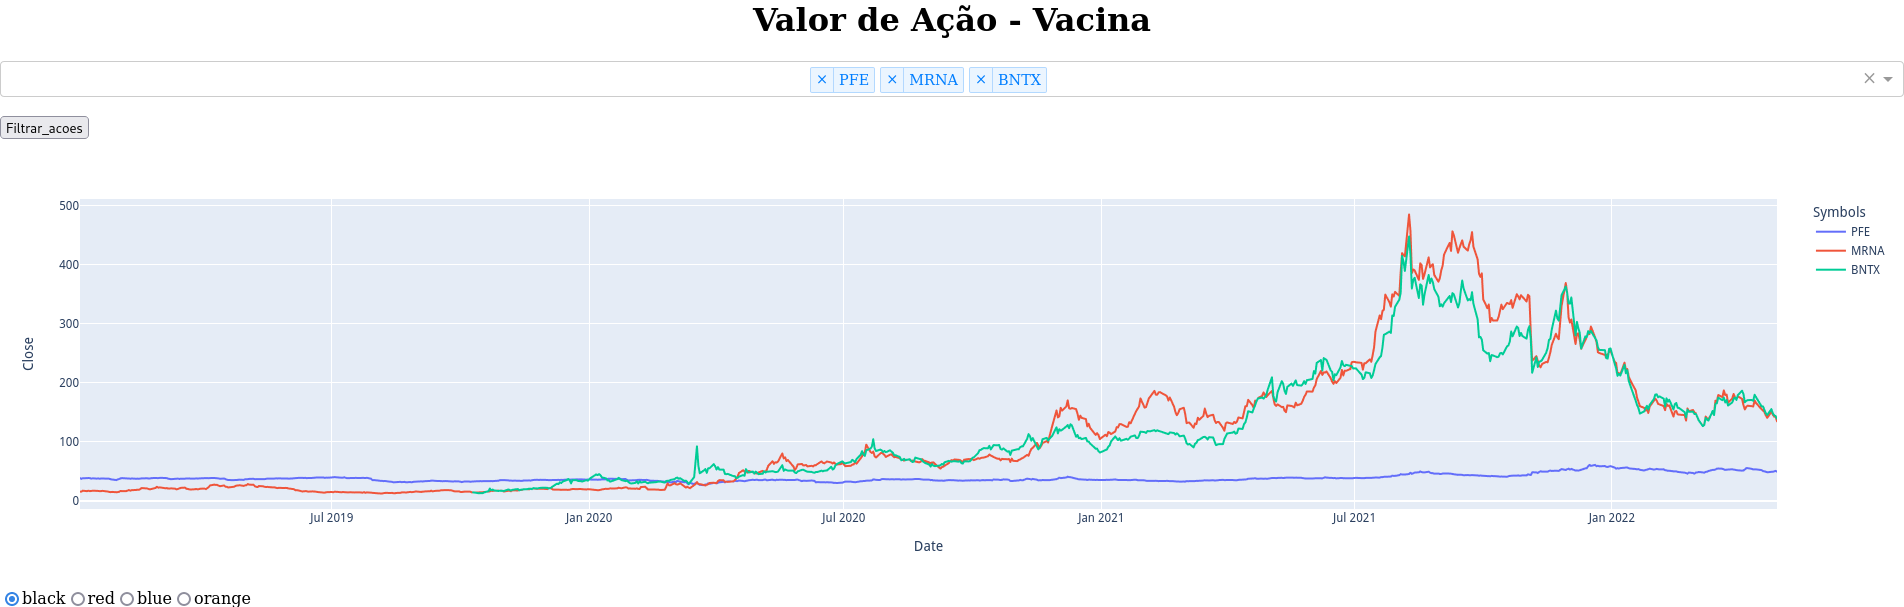

In [8]:
Image('Screenshot 2022-05-03 at 09-31-28 Dash.png')